In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# K-means Scratch

In [53]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        ## Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
        self.best_sse_score = None
        self.best_center = None
        
    def fit(self, X):
        """
       Calculate clustering by K-means
        Parameters
        ----------
        X : The following form ndarray, shape (n_samples, n_features)
           Features of training data
        """
        
        ## Set the number of samples
        self.num_samples = len(X)
        
       ## Specified number of times Change the initial value and calculate
        for i in range(self.n_init):
            
            ## Create the initial value of the center point according to the number of clusters
            default_center_idx   = np.random.randint(0, self.num_samples, self.n_clusters)
            self.center_clusters = np.array([X[i] for i in default_center_idx])
            
            ## Label initialization
            ## self.labels = np.zeros(self.num_samples)
            self.labels = np.random.randint(0, self.n_clusters, self.num_samples)

            ## Update center point
            for _ in range(self.max_iter):
                new_center_clusters = np.array([np.average(X[self.labels == k], axis=0) 
                                                for k in range(self.n_clusters)])
                
               ## Reassign the center point to a random point if there are empty clusters
                for n in range(self.n_clusters):
                    if not np.any(new_center_clusters == n):
                        self.center_clusters[n] = X[np.random.choice(X.shape[0], 1), :]

                if np.allclose(self.center_clusters, new_center_clusters, atol=self.tol):
                    break
                
                self.center_clusters = new_center_clusters
                
                dist = np.array([np.linalg.norm(X- self.center_clusters[k], axis=1)
                                 for k in range(self.n_clusters)])
            
                self.labels = np.argmin(dist, axis=0)
                

            ## Calculate sse and update if it is the best score
            new_sse_score = self._sum_squared_errors(X)
            
            if self.best_sse_score is None or self.best_sse_score > new_sse_score:
                self.best_sse_score = new_sse_score
                self.best_center = self.center_clusters
        
          ## Output the learning process when verbose is set to True
            if self.verbose:
                print(f"iter{i}: sse score:", self.best_sse_score)
            
    def predict(self, X):
        """
        Calculate which cluster the entered data belongs to
        """
        dist = np.array([np.linalg.norm(X - self.best_center[k], axis=1)
                         for k in range(self.n_clusters)])
        
        pred = np.argmin(dist, axis=0)
        
        return pred
    
    def _sum_squared_errors(self, X):
        """
        Calculate SSE
        """
        sse = 0
        for k in range(self.n_clusters):
            diff = X[self.labels == k] - self.center_clusters[k]
            sse += np.linalg.norm(diff)**2

        return sse
    
    def _update_centers(self, X):
        """
       Update center point
        """
        new_center_clusters = np.array([np.average(X[self.labels == k], axis=0)
                                         for k in range(self.n_clusters)])
        
        dist = np.array([np.linalg.norm(X- self.center_clusters[k], axis=1)
                         for k in range(self.n_clusters)])
        labels = np.argmin(dist, axis=0)
        return labels

In [54]:
## Artificial dataset for clustering
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Problem 1
## Determine the initial value of the center point

In [55]:
n_clusters = 2

default_center_idx = np.random.randint(0, len(X), n_clusters)
center_clusters = np.array([X[i] for i in default_center_idx])
center_clusters

array([[1.00952869, 4.45502328],
       [1.42002502, 1.38236201]])

# Problem 2 
## Creation of a function to obtain SSE

In [56]:
def sum_squared_errors(X, labels, center_clusters):
    num_cluster = len(center_clusters)
    ## sse = np.array([np.linalg.norm(X[labels == k] - clusters_mu[k])**2 for k in range(num_cluster)]).sum()
    sse = 0
    for k in range(num_cluster):
        norm = X[labels == k] - center_clusters[k]
        sse += np.linalg.norm(norm)**2
    return sse

In [57]:
x1 = np.arange(1, 11).reshape(-1, 1)
x2 = np.arange(10, 0, -1).reshape(-1, 1)
X_test = np.concatenate([x1, x2], axis=1)

labels_test = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
cluster_centers_test = np.array([[3, 8], [8, 3]]).reshape(-1, 2)

print("X", X_test)
print("labels", labels_test)
print("mu", cluster_centers_test)

X [[ 1 10]
 [ 2  9]
 [ 3  8]
 [ 4  7]
 [ 5  6]
 [ 6  5]
 [ 7  4]
 [ 8  3]
 [ 9  2]
 [10  1]]
labels [0 0 0 0 0 1 1 1 1 1]
mu [[3 8]
 [8 3]]


In [58]:
sum_squared_errors (X_test, labels_test, cluster_centers_test)

40.00000000000001


# Problem 7
## Estimate

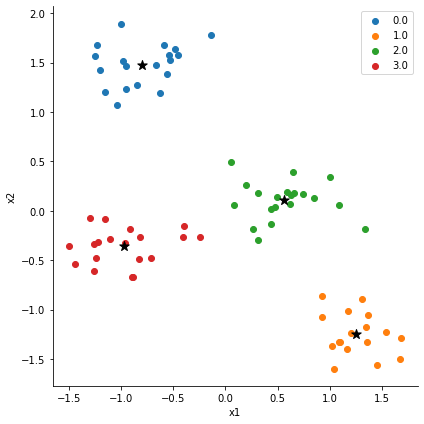

predict: [0 1 1 3 0 2 2 0 2 3 2 3 1 0 3 2 1 1 3 0 2 0 3 0 0]


In [59]:
## Standardization
sc = StandardScaler()
X = sc.fit_transform(X)

## Data partition
X_train, X_test = train_test_split(X)

#ハイパーパラメーター
max_iter = 50
n_init = 100
tol = 0

## Learning
km = ScratchKMeans(n_clusters=4, max_iter=max_iter, n_init=n_init, tol=tol)
km.fit(X_train)

## Visualization
df_train = pd.DataFrame(data=np.concatenate([X_train, km.labels.reshape(-1,1)], axis=1), columns=["x1", "x2", "label"])
g = sns.FacetGrid(data=df_train, hue="label", height=6)
g.map(plt.scatter, "x1", "x2")
plt.legend()
plt.scatter(km.best_center[:,0], km.best_center[:,1], marker="*", c="black", s=100)
plt.show()

## Forecast
print("predict:", km.predict(X_test))


# Problem 8
## Implementation of Elbow Method

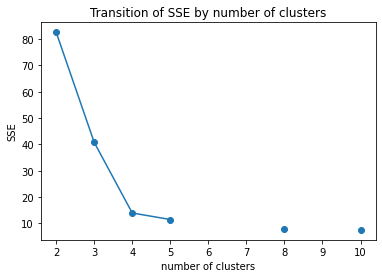

In [60]:
## Hyperparameters
max_iter = 50
n_init = 100
tol = 0

## initial value
sse = []
n_cluster = list(range(2, 11))

for k in n_cluster:
    km = ScratchKMeans(n_clusters=k, max_iter=max_iter, n_init=n_init, tol=tol)
    km.fit(X)
    sse.append(km.best_sse_score)

plt.plot(n_cluster, sse, marker="o")
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.title("Transition of SSE by number of clusters")
plt.show()


# Problem 9 (Advance task) 
## Silhouette diagram

In [61]:
data_all = pd.read_csv("Wholesale customers data.csv")
data_all.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [62]:
data = data_all.drop(columns=["Channel", "Region"])

In [63]:
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


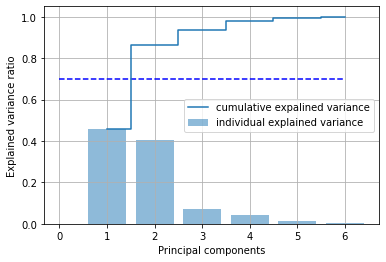

In [64]:
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()


# Problem 10
## Selection of the number of clusters k

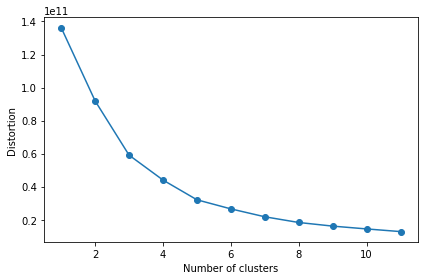

In [65]:
distortions = []
for i in range(1,12):
    km = KMeans(n_clusters=i,
                n_init=10,
                max_iter=350,
                random_state=0)
    y_km = km.fit_predict(data_pca)
    km.fit(data_pca)
    distortions.append(km.inertia_)
plt.plot(range(1, 12), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()


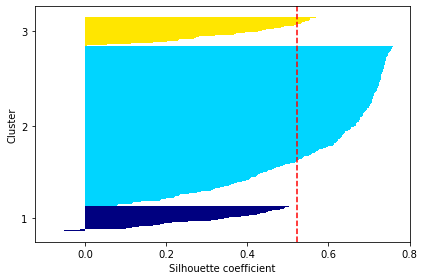

In [66]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=350,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(data_pca)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()


# Problem 11 
## Comparison with known groups

In [67]:
## Collect data into one
df_pca = pd.DataFrame(np.concatenate([data_all[["Channel","Region"]] ,data_pca, y_km[:, np.newaxis]], axis=1),
                      columns=["Channel", "Region", "x1", "x2", "cluster"])
df_pca.head()

,Channel,Region,x1,x2,cluster
0,2.0,3.0,650.02,1585.52,1.0
1,2.0,3.0,-4426.80,4042.45,1.0
2,2.0,3.0,-4842.00,2578.76,1.0
3,1.0,3.0,990.35,-6279.81,1.0
4,2.0,3.0,10658.00,-2159.73,2.0


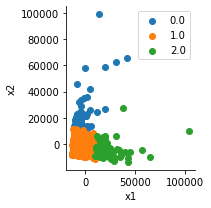

In [68]:
## Visualize clusters
g = sns.FacetGrid(df_pca, hue="cluster")
g.map(plt.scatter, "x1", "x2")
plt.legend()
plt.show()

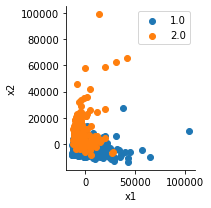

In [69]:
## Visualize the distribution of Channel
g = sns.FacetGrid(df_pca, hue="Channel")
g.map(plt.scatter, "x1", "x2")
plt.legend()
plt.show()

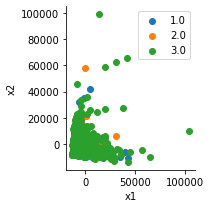

In [70]:
## Visualize the distribution of Region
g = sns.FacetGrid(df_pca, hue="Region")
g.map(plt.scatter, "x1", "x2")
plt.legend()
plt.show()

# Problem 12 
## Useful information for wholesalers

In [71]:
 ## Add column for total sales
data_all["Total_Sales"] = data_all[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum(axis=1)

In [72]:
data_all.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Sales
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87,33226.14
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11,26356.30
min,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00,904.00
25%,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25,17448.75
50%,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50,27492.00
75%,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25,41307.50
max,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00,199891.00


What you can see from the basic statistics

. More than half of the sales channels are for vendors such as Horeca (restaurants, cafes, hotels).

. Region accounts for more than half of data from regions other than Lisbon and Porto.

. Since there is a large discrepancy between the average value and the maximum value for each product for sale, it is expected that there are some large transactions and the distribution is biased to the left.

. Fresh food ＞ Food ＞ Frozen food ＞ Dairy products ＞ Side dishes ＞ Sanitary goods sales order.

. Since the accumulated sales of each product and the minimum value of the total sales are different, many customers make large transactions for a specific product.

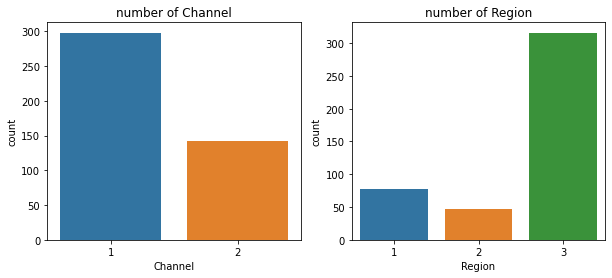

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x="Channel", data=data_all, ax=axes[0])
sns.countplot(x="Region", data=data_all, ax=axes[1])
axes[0].set_title("number of Channel")
axes[1].set_title("number of Region")
plt.show()

# Analysis 1 
## Survey of total sales by region and sales channel

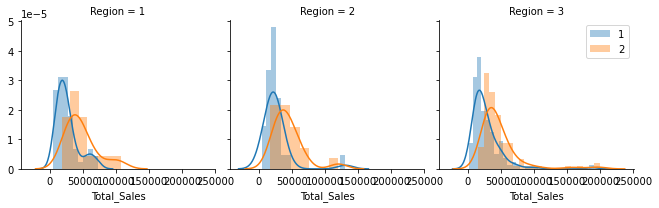

In [74]:
g = sns.FacetGrid(data_all, hue="Channel", col="Region" )
g.map(sns.distplot,"Total_Sales")
plt.legend()
plt.show()

. The city of Porto has a high sales ratio of Holeka. Other areas are about the same.

. Retailers tend to have higher sales channels in all regions.

# Analysis 2 
## Sales by region / product

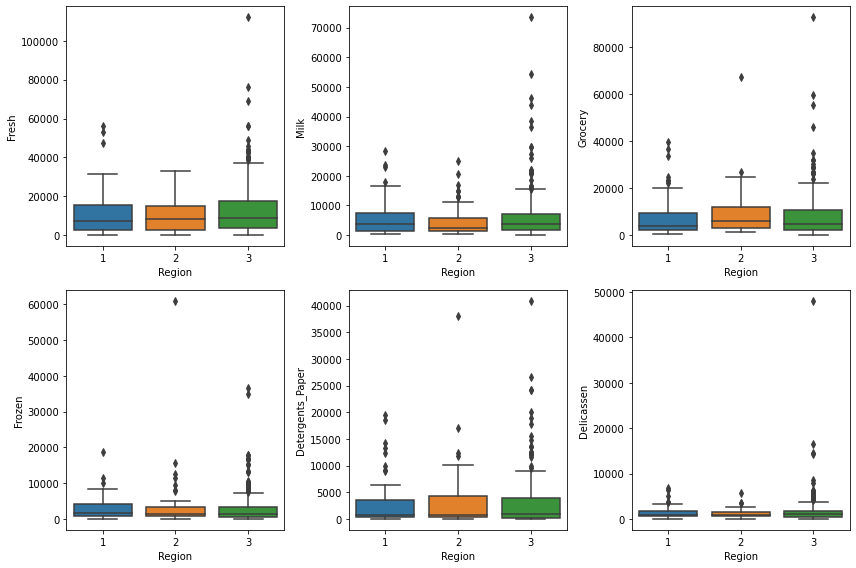

In [75]:
col = ["Fresh", "Milk", "Grocery" ,"Frozen", "Detergents_Paper", "Delicassen"]

fig, axes = plt.subplots(2, 3, figsize=(12,8))

for i, c in enumerate(col):
    sns.boxplot(x="Region", y=c, data=data_all, ax=axes[int(i/3), i%3])
    
plt.tight_layout()
plt.show()

・ There is almost no difference in sales for each product by region.

# Analysis 3
## Sales by sales channel / product

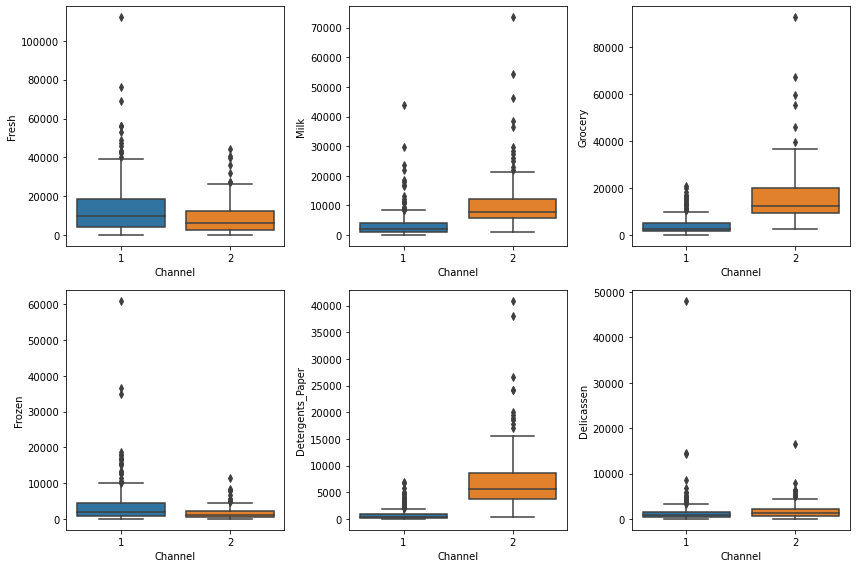

In [76]:
col = ["Fresh", "Milk", "Grocery" ,"Frozen", "Detergents_Paper", "Delicassen"]

fig, axes = plt.subplots(2, 3, figsize=(12,8))

for i, c in enumerate(col):
    sns.boxplot(x="Channel", y=c, data=data_all, ax=axes[int(i/3), i%3])
    
plt.tight_layout()
plt.show()

. Dairy products, grocery products, hygiene products, etc. have high sales to retail stores

. Holeka has higher sales of fresh and frozen foods

# Analysis 4 
## Cluster analysis

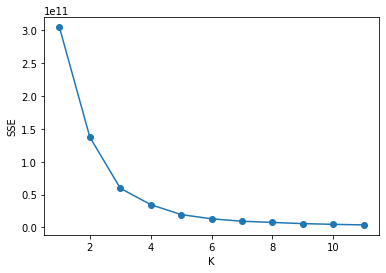

In [77]:
data_c = data_all.copy()

num_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

## Standardization
sc = StandardScaler()
data_c[num_cols] = sc.fit_transform(data_c[num_cols])

## Clustering
objective_vals = []
K = range(1, 12)
for k in range(1, 12):
    km = KMeans(n_clusters=k, n_init=30, max_iter=200, tol=1e-4, random_state=0)
    km = km.fit(data_c)
    objective_vals.append(km.inertia_)

plt.plot(K, objective_vals, marker="o")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

K = 3 seems appropriate

In [78]:
pred = KMeans(n_clusters=3, n_init=50, max_iter=200, tol=1e-4, random_state=0).fit_predict(data_c)
data_all["cluster"] = pred
data_all.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Sales,cluster
0,2,3,12669,9656,7561,214,2674,1338,34112,0
1,2,3,7057,9810,9568,1762,3293,1776,33266,0
2,2,3,6353,8808,7684,2405,3516,7844,36610,0
3,1,3,13265,1196,4221,6404,507,1788,27381,0
4,2,3,22615,5410,7198,3915,1777,5185,46100,2


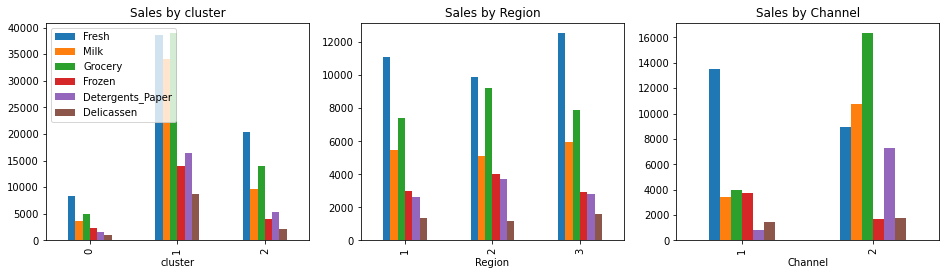

In [79]:
fig, axes = plt.subplots(1,3, figsize=(16,4))

data_all.groupby(["cluster"]).mean().drop(columns=["Channel", "Region", "Total_Sales"]).plot.bar(ax=axes[0], legend=True)
data_all.groupby(["Region"]).mean().drop(columns=["Channel", "cluster", "Total_Sales"]).plot.bar(ax=axes[1], legend=False)
data_all.groupby(["Channel"]).mean().drop(columns=["Region", "cluster", "Total_Sales"]).plot.bar(ax=axes[2], legend=False)
axes[0].legend(loc="upper left")
axes[0].set_title("Sales by cluster")
axes[1].set_title("Sales by Region")
axes[2].set_title("Sales by Channel")
plt.show()

From the above figure, it can be expected that the cluster grouped customers according to the sales scale (0: small scale, 2: medium scale, 1: large scale).

Finally, let's check the sales composition of each cluster

In [80]:
pd.set_option('precision', 2)

sales_ratio = data_all.groupby("cluster").sum()[num_cols].apply(lambda x:x / data_all.groupby("cluster").sum()["Total_Sales"])
sales_ratio

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,0.38,0.16,0.22,0.11,0.07,0.05
1,0.26,0.23,0.26,0.09,0.11,0.06
2,0.37,0.17,0.25,0.07,0.10,0.04


# Problem 13 (Advance task) 
## Investigation of other methods

In addition to K-means dealt with this time, DBSCAN is a well-known method for non-hierarchical clustering.

In addition to PCA, t-SNE and LLE are well-known methods for dimensionality reduction.


What is DBSCAN
DBSCAN (Density-based spatial clustering of applications with noise) is a density-based clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. The area is judged as a cluster based on how many points are within the radius. As long as the density of the neighborhood exceeds a certain threshold, the cluster will continue to grow. Points that are not close within a radius are noise.

Advantages

Unlike k-means, you can create a cluster without first deciding the number of clusters.
You can even classify sharp clusters. It does not assume that the cluster is spherical.
Determine the cluster by the density of the neighborhood.
Disadvantages

The concept of border points is subtle, and the data may change which cluster it belongs to.
It is difficult to determine the parameters without knowing the data.
Important parameters

eps: Radial distance when searching for a nearby point from a certain point
min_samples: Number of points included in the radius range when judging as a cluster


What is t-SNE?
A method that can reduce the dimension of data that holds a non-linear structure in a high-dimensional space without impairing the similarity.

Key points for understanding t-SNE

Dimensionality reduction concept in t-SNE: Non-linear transformation to maintain the relationship with nearby points as much as possible.
Representation method of relationships between data: Represents relationships between points using a probability distribution.
Distribution optimization: Use KL divergence between the same points corresponding to the cost function in high and low dimensions.
Important parameters

perplecity: Contributes to determining how close points are considered when assessing relationships between data

Advantages

Very well captures high-dimensional local structures
Disadvantages

Perplexity makes the cluster completely different
It is faithful to local information, but cannot retain global information at all. It cannot retain positional relationships in feature space.
Usage scene

For example, when you want to visualize the relationships between classes by dropping fairly high-dimensional data into 2D or 3D.
What is LLE
A method that takes an approach called manifold learning.
A method to locally find a figure that can be regarded as a low-dimensional hyperplane and reduce it to a lower dimension.

merit

It is possible to reduce the dimension of non-linear data without impairing the similarity.
Demerit

When there are multiple manifolds, the positional relationship cannot be saved well with each other.
It is difficult to apply to large-scale data because the amount of calculation to reconstruct the data position after compression is proportional to the square of the number of data.






# Problem 14 (Advance issue) 
## Use of t-SNE and DBSCAN

In [81]:


data_all = pd.read_csv("Wholesale customers data.csv")

#カテゴリ列は除く
data = data_all.drop(columns=["Channel", "Region"])

sc = StandardScaler()
data = sc.fit_transform(data)

data_embedded = TSNE(n_components=2, perplexity=50).fit_transform(data)

clustering = DBSCAN(eps=1.5, min_samples=5)
clustering.fit(data_embedded)

cluster_labels = clustering.labels_.reshape(-1, 1)
data_embedded = np.concatenate([data_embedded, cluster_labels], axis=1)
cluster, _ = np.unique(cluster_labels, return_counts=True)
cluster, _


(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 32, 120,  67,   7, 178,  27,   4,   5], dtype=int64))

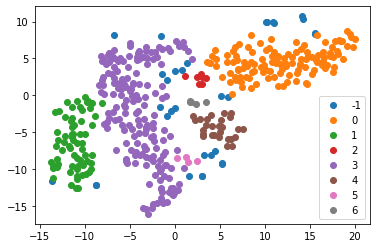

In [82]:
for y in cluster:
    y_filter = data_embedded[:, 2] == y
    plt.scatter(data_embedded[y_filter, 0], data_embedded[y_filter, 1], label=str(y))

plt.legend()
plt.show()